### Import libraries

In [968]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

### Read the file 

In [969]:
bike = pd.read_csv(r"C:\Users\owner's\Desktop\Python\Bike Case Study\Bike_data.csv")

### Get basic understanding of the data set

In [970]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [971]:
bike.shape

(730, 16)

730 rows and 16 columns

In [972]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No null or missing values 

In [973]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Dropping count of casuaal and registeted user as Cnt = casual + registered

In [974]:
bike = bike.drop("casual", axis = 1)

bike = bike.drop("registered", axis = 1)

bike = bike.drop("dteday", axis = 1)

bike = bike.drop("instant", axis = 1)

bike.head()



,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [975]:
#checking shape of the df

bike.shape

(730, 12)

In [976]:
# Mapping categorical variable 'season' from the data dictionary

season_df = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}

bike["season_desc"] = bike["season"].map(season_df)

bike["season_desc"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [977]:
#drop 'season'

bike = bike.drop("season", axis = 1)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_desc
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,spring
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,spring
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,spring
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,spring
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,spring


In [978]:
# Mapping categorical variable 'season' from the data dictionary

weather_df = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}

bike["weathersit_desc"] = bike["weathersit"].map(weather_df)

bike["weathersit_desc"].unique()

array(['Mist', 'Clear', 'Light Snow'], dtype=object)

In [979]:
#drop 'season'

bike = bike.drop("weathersit", axis = 1)
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_desc,weathersit_desc
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,spring,Mist
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,spring,Mist
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,spring,Clear
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,spring,Clear
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,spring,Clear


### Visualise categorical variable

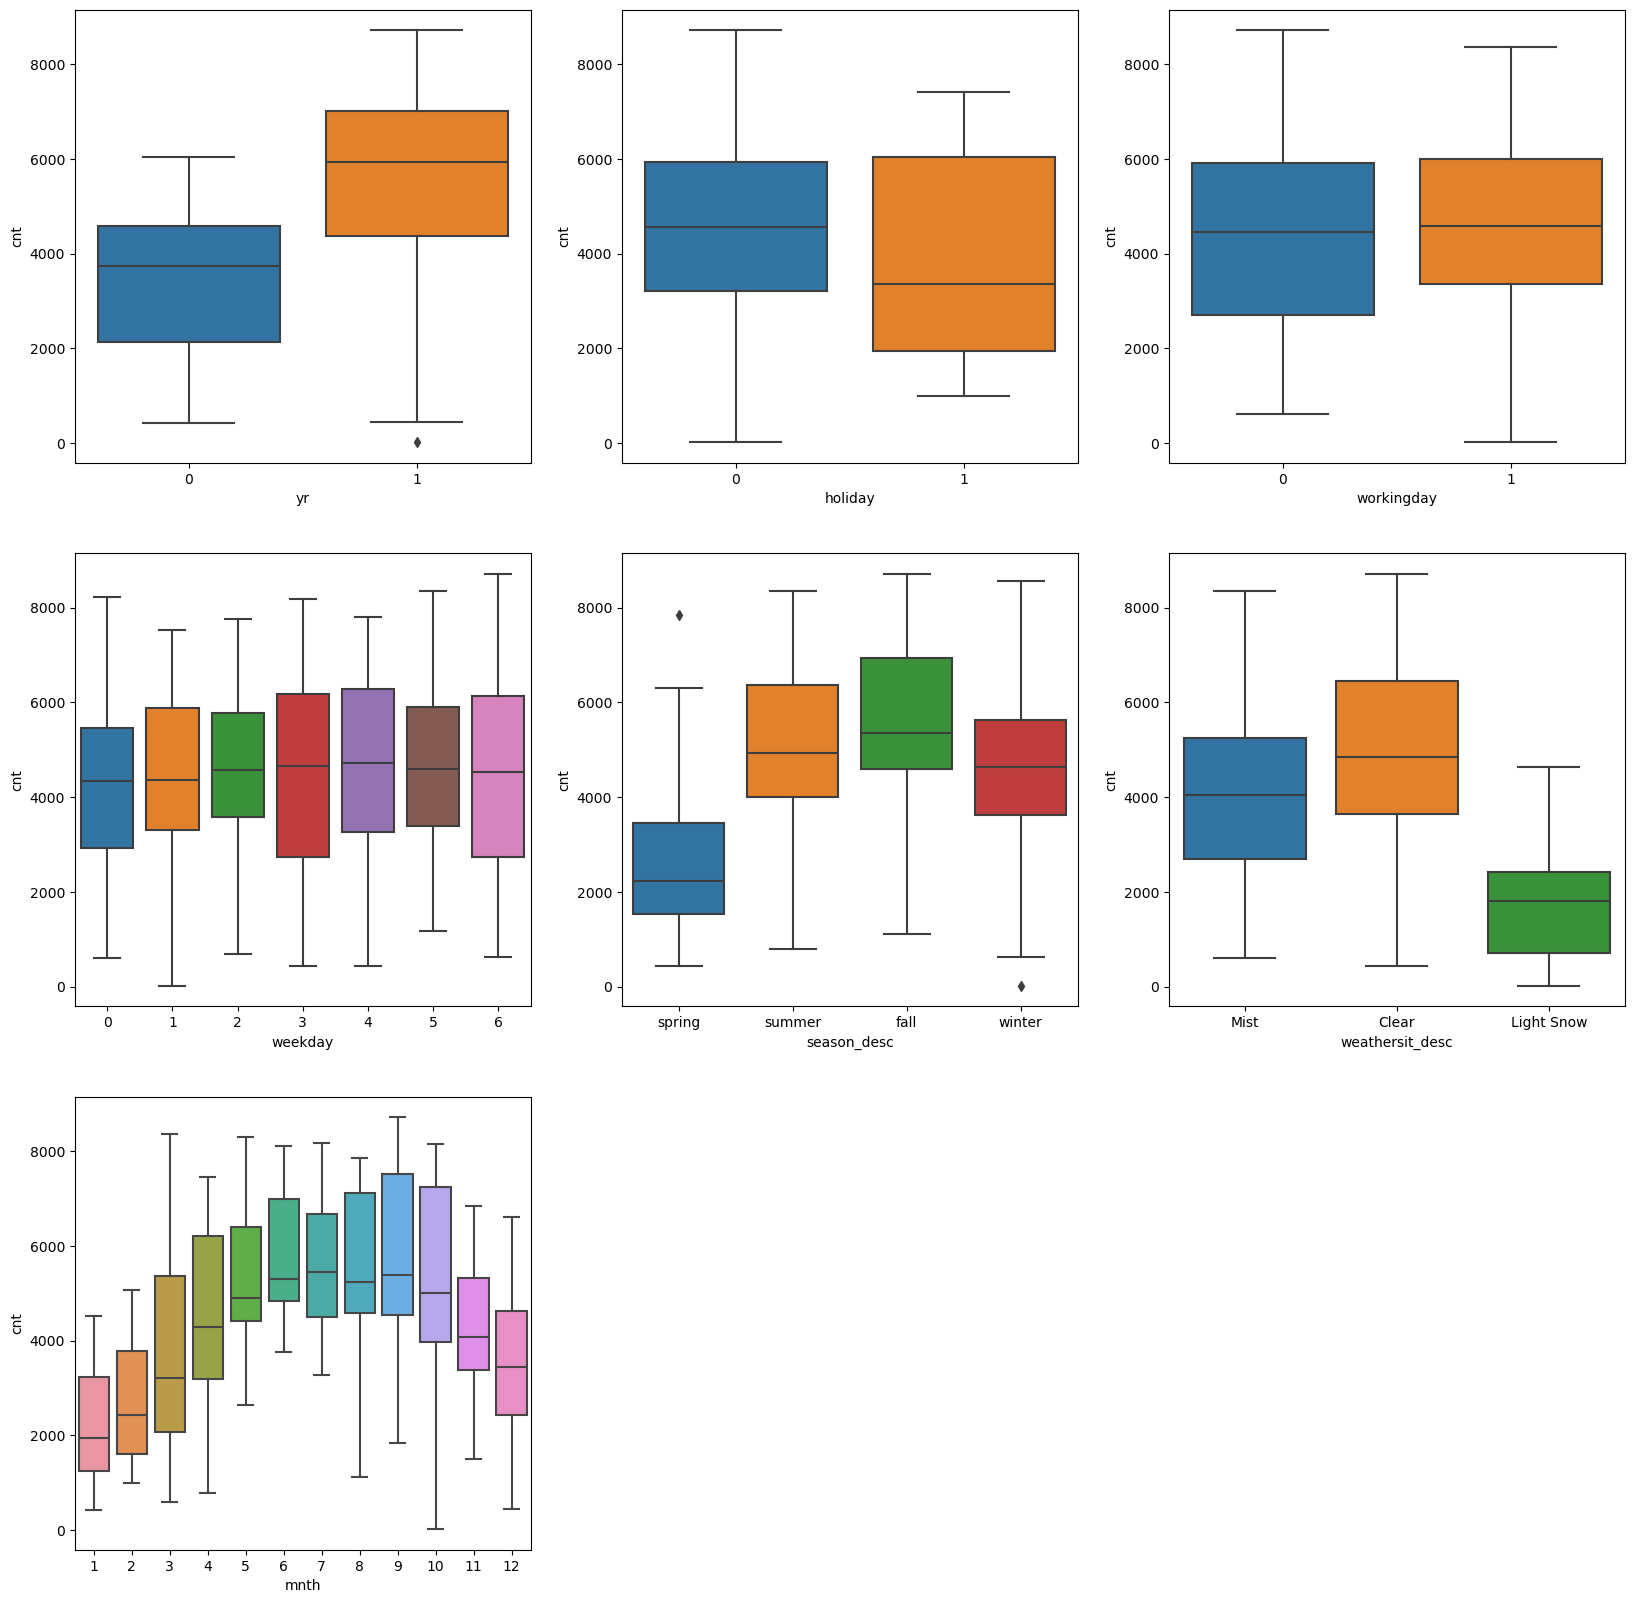

In [980]:


plt.figure(figsize = (20,20))

plt.subplot ( 3,3,1)

sns.boxplot(x = 'yr', y = 'cnt', data = bike) 

plt.subplot ( 3,3,2)

sns.boxplot(x = 'holiday', y = 'cnt', data = bike) 

plt.subplot ( 3,3,3)

sns.boxplot(x = 'workingday', y = 'cnt', data = bike) 

plt.subplot ( 3,3,4)

sns.boxplot(x = 'weekday', y = 'cnt', data = bike) 

plt.subplot ( 3,3,5)

sns.boxplot(x = 'season_desc', y = 'cnt', data = bike) 

plt.subplot ( 3,3,6)

sns.boxplot(x = 'weathersit_desc', y = 'cnt', data = bike) 

plt.subplot ( 3,3,7)

sns.boxplot(x = 'mnth', y = 'cnt', data = bike) 



plt.show()

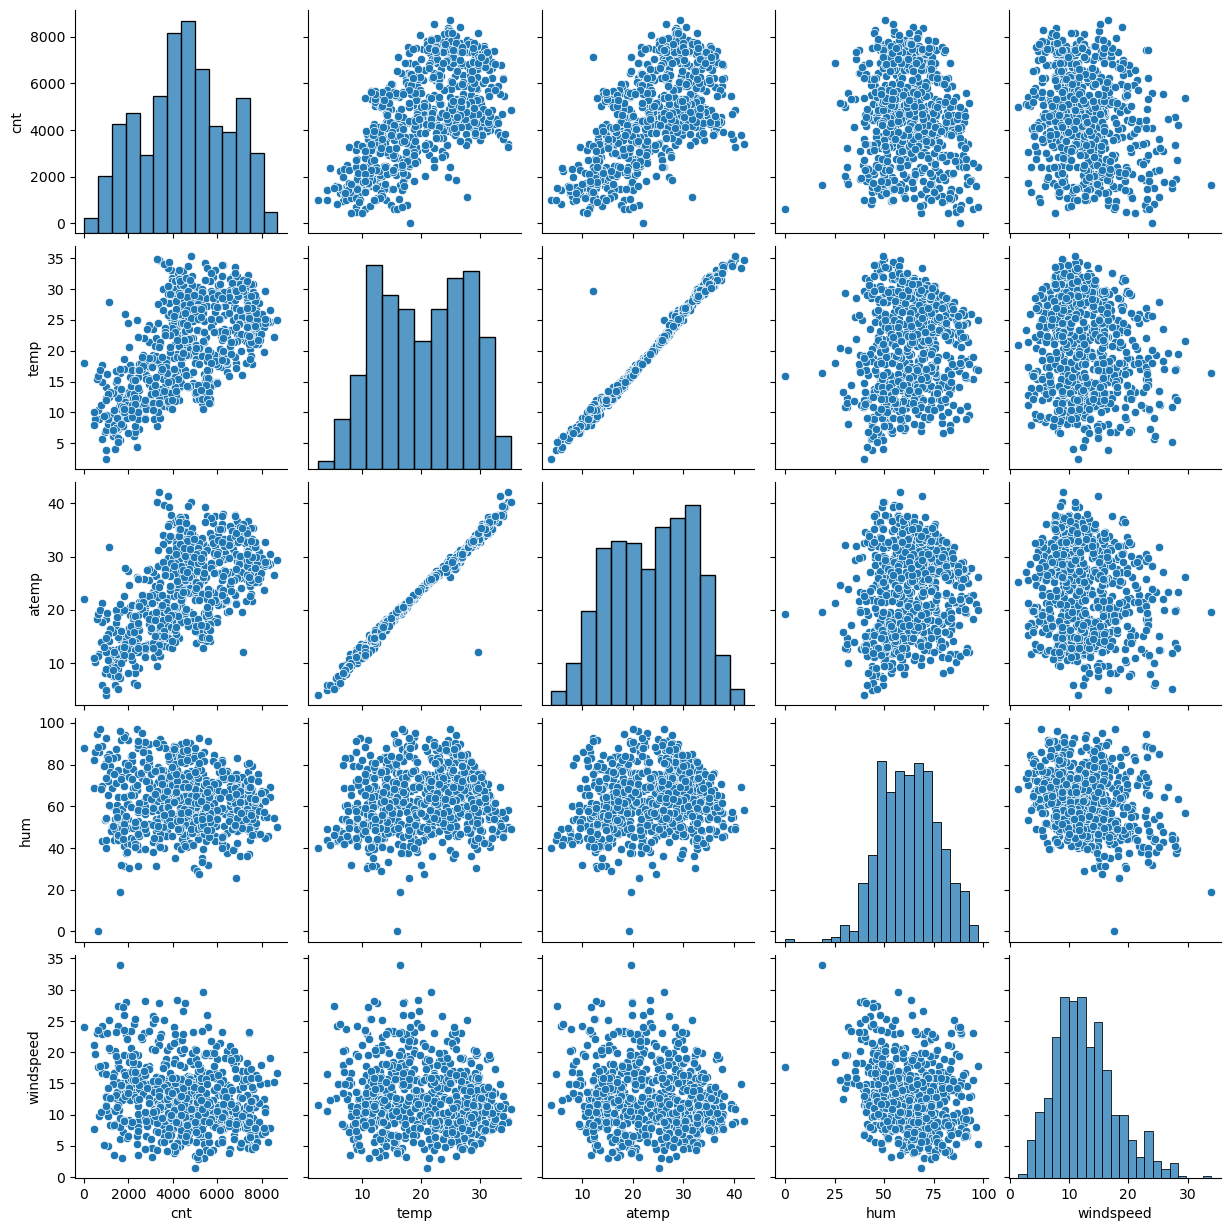

In [981]:
# visualise numerical variable for bike
numerical_columns = ["cnt","temp","atemp","hum","windspeed"]
numerical_value = bike[numerical_columns]
sns.pairplot(numerical_value)
plt.show()


In [982]:
bike.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'season_desc', 'weathersit_desc'],
      dtype='object')

In [983]:
# create dummy variable for catergorial variable season_desc

season_type = pd.get_dummies(bike["season_desc"], drop_first = True)
season_type = season_type.astype(int)
season_type.head()



,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [984]:
# concatenate the dummy variables with bike data frame

In [985]:
bike = pd.concat([bike,season_type], axis=1)

bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_desc,weathersit_desc,spring,summer,winter
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,spring,Mist,1,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,spring,Mist,1,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,spring,Clear,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,spring,Clear,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,spring,Clear,1,0,0


In [986]:
#drop season_desc columns

bike = bike.drop("season_desc", axis = 1)

bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_desc,spring,summer,winter
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,Mist,1,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,Mist,1,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,Clear,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,Clear,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,Clear,1,0,0


In [987]:
# create dummy variable for catergorial variable weathersit_desc

weather_type = pd.get_dummies(bike["weathersit_desc"], drop_first = True)
weather_type = weather_type.astype(int)
weather_type.head()



,Light Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [988]:
# concatenate the dummy variables with bike data frame

bike = pd.concat([bike,weather_type], axis=1)

bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_desc,spring,summer,winter,Light Snow,Mist
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,Mist,1,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,Mist,1,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,Clear,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,Clear,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,Clear,1,0,0,0,0


In [989]:
#drop weathersit_desc

bike = bike.drop("weathersit_desc", axis = 1)

bike.head()


,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [990]:

# Mapping categorical variable 'yr' from the data dictionary

year_df = {0:'2018', 1:'2019'}

bike["year_desc"] = bike["yr"].map(year_df)

bike = bike.drop("yr", axis = 1)

# create dummy variable for catergorial variable 'year_desc'

year_type = pd.get_dummies(bike["year_desc"], drop_first = True)
year_type = year_type.astype(int)


# concatenate the dummy variables with bike data frame

bike = pd.concat([bike,year_type], axis=1)


#drop year_desc

bike = bike.drop("year_desc", axis = 1)

bike.head()


,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist,2019
0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0
1,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0
2,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0
3,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0
4,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0


In [991]:
# Mapping categorical variable 'mnth' from the data dictionary

month_df = { 1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}

bike["month_desc"] = bike["mnth"].map(month_df)

bike = bike.drop("mnth", axis = 1)

# create dummy variable for catergorial variable 'year_desc'

month_type = pd.get_dummies(bike["month_desc"], drop_first = True)
month_type = month_type.astype(int)


# concatenate the dummy variables with bike data frame

bike = pd.concat([bike,month_type], axis=1)

#drop month_desc

bike = bike.drop("month_desc", axis = 1)

bike.head()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


### Train Test Split

In [992]:
df_train,df_test= train_test_split(bike , train_size=0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 25)
(220, 25)


### Rescaling the feature

In [993]:
# Instantiage an object
scaler = MinMaxScaler()

#create a list of numeric variable

num_vars = ['temp','atemp','hum','windspeed','cnt']

#fit_transform on data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
576,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0
111,0,5,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,0


### Training the Model

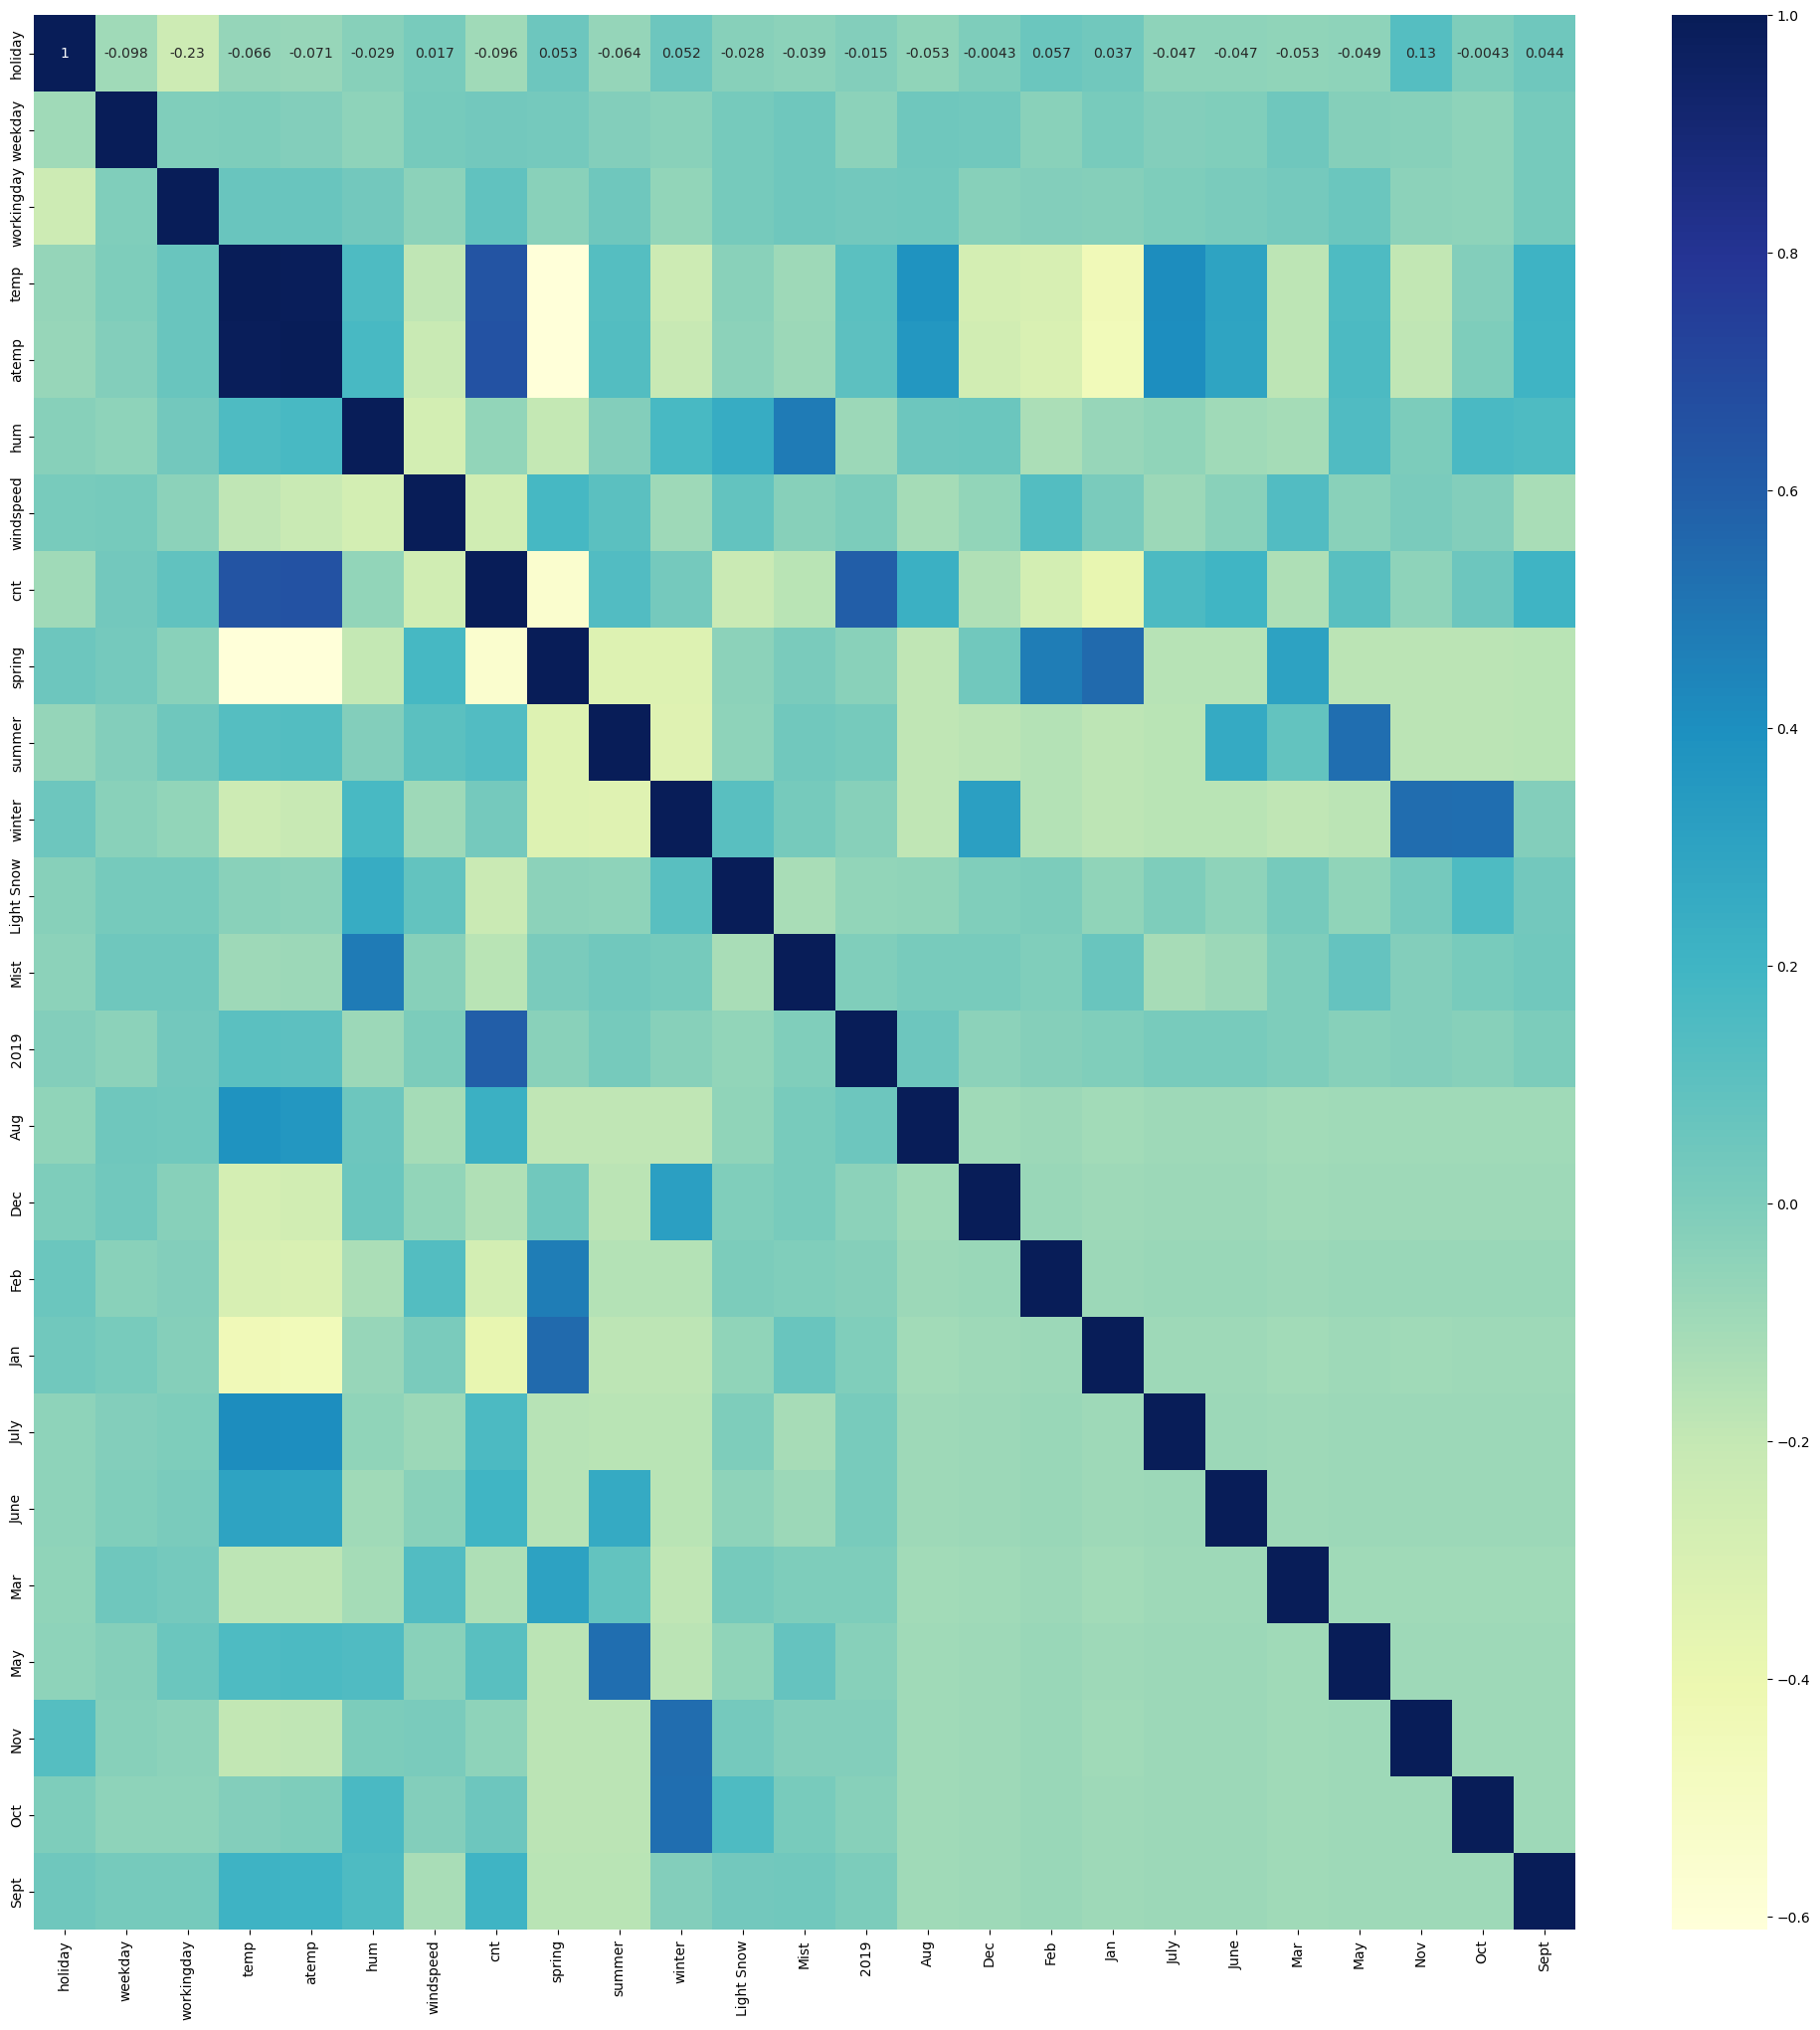

In [998]:
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr() , annot= True, cmap= "YlGnBu" )
plt.show()

### X Train & Y Train

In [999]:
y_train = df_train.pop("cnt")
X_train = df_train


In [1000]:
X_train.head()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
576,0,2,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,0,6,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,0,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,0,6,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,0,5,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Build the model

In [1001]:
# build a model with all variables

X_train_sm = sm.add_constant(X_train)


#create a  model

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()


lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.5
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          4.27e-184
Time:                        20:21:57   Log-Likelihood:                 526.44
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     485   BIC:                            -897.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2871      0.044      6.505      0.000       0.200       0.374
holiday       -0.0655      0.026     -2.494      0.013      -0.117      -0.014
weekday        0.0078      0.002      3.912      0.000       0.004       0.012
workingday     0.0172      0.009      1.978      0.048       0.000       0.034
temp           0.3816      0.141      2.703      0.007       0.104       0.659
atemp          0.0644      0.137      0.469      0.639      -0.205       0.334
hum           -0.1511      0.038     -3.925      0.000      -0.227      -0.075
windspeed     -0.1830      0.026     -6.966      0.000      -0.235      -0.131
spring        -0.0447      0.030     -1.494      0.136      -0.103       0.014
summer         0.0433      0.026      1.659      0.098      -0.008       0.095
winter         0.1085      0.028      3.895      0.000       0.054       0.163
Light Snow    -0.2535      0.026     -9.650      0.000      -0.305      -0.202
Mist          -0.0594      0.010     -5.719      0.000      -0.080      -0.039
2019           0.2328      0.008     28.937      0.000       0.217       0.249
Aug            0.0235      0.034      0.695      0.487      -0.043       0.090
Dec           -0.0452      0.034     -1.348      0.178      -0.111       0.021
Feb           -0.0327      0.033     -0.995      0.320      -0.097       0.032
Jan           -0.0631      0.034     -1.884      0.060      -0.129       0.003
July          -0.0317      0.035     -0.908      0.364      -0.100       0.037
June           0.0070      0.025      0.283      0.777      -0.042       0.056
Mar            0.0014      0.024      0.058      0.954      -0.047       0.050
May            0.0255      0.021      1.209      0.227      -0.016       0.067
Nov           -0.0410      0.036     -1.132      0.258      -0.112       0.030
Oct            0.0071      0.036      0.199      0.843      -0.063       0.077
Sept           0.0874      0.032      2.740      0.006       0.025       0.150
==============================================================================
Omnibus:                       84.303   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.919
Skew:                          -0.803   Prob(JB):                     1.60e-51
Kurtosis:                       5.903   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1033]:
# create a dataframe which will caontain the name of each variable along with its VIF

vif = pd.DataFrame()
vif["Feature"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values( by = "VIF", ascending = False)
vif

,Feature,VIF
3,temp,434.11
4,atemp,379.52
5,hum,37.34
7,spring,11.73
9,winter,11.62
8,summer,6.86
22,Oct,6.28
21,Nov,6.10
13,Aug,5.91
6,windspeed,5.31


### Removing atemp as it has a high VIF and high p value

In [1003]:
X = X_train.drop("atemp", axis = 1)

In [1004]:
# create another model without atemp

X_train_sm = sm.add_constant(X)


#create a  model

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()


lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.8
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          4.27e-185
Time:                        20:21:59   Log-Likelihood:                 526.32
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     486   BIC:                            -903.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2874      0.044      6.519      0.000       0.201       0.374
holiday       -0.0663      0.026     -2.527      0.012      -0.118      -0.015
weekday        0.0077      0.002      3.897      0.000       0.004       0.012
workingday     0.0172      0.009      1.975      0.049    9.21e-05       0.034
temp           0.4442      0.046      9.643      0.000       0.354       0.535
hum           -0.1505      0.038     -3.915      0.000      -0.226      -0.075
windspeed     -0.1856      0.026     -7.234      0.000      -0.236      -0.135
spring        -0.0441      0.030     -1.478      0.140      -0.103       0.015
summer         0.0440      0.026      1.690      0.092      -0.007       0.095
winter         0.1091      0.028      3.924      0.000       0.054       0.164
Light Snow    -0.2544      0.026     -9.716      0.000      -0.306      -0.203
Mist          -0.0595      0.010     -5.730      0.000      -0.080      -0.039
2019           0.2327      0.008     28.959      0.000       0.217       0.248
Aug            0.0214      0.033      0.640      0.522      -0.044       0.087
Dec           -0.0451      0.033     -1.348      0.178      -0.111       0.021
Feb           -0.0328      0.033     -0.999      0.318      -0.097       0.032
Jan           -0.0634      0.033     -1.893      0.059      -0.129       0.002
July          -0.0330      0.035     -0.949      0.343      -0.101       0.035
June           0.0055      0.025      0.224      0.823      -0.043       0.054
Mar            0.0012      0.024      0.047      0.962      -0.047       0.049
May            0.0245      0.021      1.170      0.242      -0.017       0.066
Nov           -0.0411      0.036     -1.134      0.257      -0.112       0.030
Oct            0.0069      0.036      0.194      0.846      -0.063       0.077
Sept           0.0865      0.032      2.720      0.007       0.024       0.149
==============================================================================
Omnibus:                       83.370   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.417
Skew:                          -0.796   Prob(JB):                     9.24e-51
Kurtosis:                       5.882   Cond. No.                         84.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check the VIF after dropping atemp

In [1005]:
 X_train_sm.columns

Index(['const', 'holiday', 'weekday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow', 'Mist', '2019', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sept'],
      dtype='object')

In [1006]:
# create a dataframe which will caontain the name of each variable along with its VIF

vif = pd.DataFrame()
vif["Feature"] = X_train_sm.columns
vif["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range (X_train_sm.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values( by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,127.13
7,spring,10.73
9,winter,9.41
8,summer,8.25
4,temp,7.06
21,Nov,6.76
22,Oct,6.46
13,Aug,6.35
16,Jan,5.89
14,Dec,5.66


### Removing spring as it has a high VIF and high p value

In [1007]:
X = X.drop("spring", axis = 1)

In [1008]:
# create another model without spring

X_train_sm = sm.add_constant(X)


#create a  model

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()


lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     126.9
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          1.10e-185
Time:                        20:22:05   Log-Likelihood:                 525.18
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     487   BIC:                            -907.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2602      0.040      6.486      0.000       0.181       0.339
holiday       -0.0663      0.026     -2.527      0.012      -0.118      -0.015
weekday        0.0077      0.002      3.864      0.000       0.004       0.012
workingday     0.0178      0.009      2.047      0.041       0.001       0.035
temp           0.4529      0.046      9.901      0.000       0.363       0.543
hum           -0.1526      0.038     -3.970      0.000      -0.228      -0.077
windspeed     -0.1886      0.026     -7.366      0.000      -0.239      -0.138
summer         0.0692      0.020      3.505      0.000       0.030       0.108
winter         0.1338      0.022      6.008      0.000       0.090       0.178
Light Snow    -0.2519      0.026     -9.629      0.000      -0.303      -0.201
Mist          -0.0590      0.010     -5.682      0.000      -0.079      -0.039
2019           0.2323      0.008     28.894      0.000       0.217       0.248
Aug            0.0436      0.030      1.458      0.145      -0.015       0.102
Dec           -0.0494      0.033     -1.477      0.140      -0.115       0.016
Feb           -0.0501      0.031     -1.629      0.104      -0.110       0.010
Jan           -0.0801      0.032     -2.539      0.011      -0.142      -0.018
July          -0.0113      0.032     -0.359      0.720      -0.073       0.051
June           0.0119      0.024      0.490      0.624      -0.036       0.060
Mar           -0.0104      0.023     -0.448      0.654      -0.056       0.035
May            0.0230      0.021      1.097      0.273      -0.018       0.064
Nov           -0.0399      0.036     -1.100      0.272      -0.111       0.031
Oct            0.0069      0.036      0.192      0.847      -0.063       0.077
Sept           0.1042      0.030      3.530      0.000       0.046       0.162
==============================================================================
Omnibus:                       80.870   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.208
Skew:                          -0.781   Prob(JB):                     4.14e-48
Kurtosis:                       5.798   Cond. No.                         83.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1009]:
# create a dataframe which will caontain the name of each variable along with its VIF

vif = pd.DataFrame()
vif["Feature"] = X_train_sm.columns
vif["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range (X_train_sm.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values( by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,104.97
4,temp,6.95
20,Nov,6.75
21,Oct,6.46
8,winter,6.02
13,Dec,5.62
15,Jan,5.22
12,Aug,5.07
7,summer,4.73
16,July,4.60


### Removing Oct as it has a high VIF and high p value

In [1010]:
X = X.drop("Oct", axis = 1)

In [1011]:
# create another model without spring

X_train_sm = sm.add_constant(X)


#create a  model

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()


lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     133.2
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          9.62e-187
Time:                        20:22:08   Log-Likelihood:                 525.16
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     488   BIC:                            -913.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2630      0.037      7.055      0.000       0.190       0.336
holiday       -0.0661      0.026     -2.523      0.012      -0.118      -0.015
weekday        0.0077      0.002      3.871      0.000       0.004       0.012
workingday     0.0177      0.009      2.046      0.041       0.001       0.035
temp           0.4526      0.046      9.910      0.000       0.363       0.542
hum           -0.1517      0.038     -3.979      0.000      -0.227      -0.077
windspeed     -0.1886      0.026     -7.372      0.000      -0.239      -0.138
summer         0.0671      0.016      4.092      0.000       0.035       0.099
winter         0.1364      0.018      7.741      0.000       0.102       0.171
Light Snow    -0.2518      0.026     -9.637      0.000      -0.303      -0.200
Mist          -0.0591      0.010     -5.695      0.000      -0.079      -0.039
2019           0.2323      0.008     28.940      0.000       0.217       0.248
Aug            0.0405      0.025      1.614      0.107      -0.009       0.090
Dec           -0.0545      0.020     -2.706      0.007      -0.094      -0.015
Feb           -0.0533      0.026     -2.076      0.038      -0.104      -0.003
Jan           -0.0834      0.027     -3.145      0.002      -0.135      -0.031
July          -0.0144      0.027     -0.531      0.596      -0.068       0.039
June           0.0102      0.023      0.451      0.652      -0.034       0.054
Mar           -0.0128      0.019     -0.662      0.509      -0.051       0.025
May            0.0219      0.020      1.087      0.277      -0.018       0.061
Nov           -0.0458      0.019     -2.369      0.018      -0.084      -0.008
Sept           0.1004      0.022      4.586      0.000       0.057       0.143
==============================================================================
Omnibus:                       80.262   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.884
Skew:                          -0.776   Prob(JB):                     1.32e-47
Kurtosis:                       5.784   Cond. No.                         60.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1012]:
# create a dataframe which will caontain the name of each variable along with its VIF

vif = pd.DataFrame()
vif["Feature"] = X_train_sm.columns
vif["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range (X_train_sm.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values( by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,90.85
4,temp,6.94
8,winter,3.78
15,Jan,3.70
12,Aug,3.57
16,July,3.42
7,summer,3.27
14,Feb,2.68
17,June,2.35
21,Sept,2.32


### Removing June as it has a high VIF and high p value

In [1013]:
X = X.drop("June", axis = 1)

In [1014]:
# create another model without spring

X_train_sm = sm.add_constant(X)


#create a  model

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()


lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.1
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          8.87e-188
Time:                        20:22:13   Log-Likelihood:                 525.05
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     489   BIC:                            -919.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2632      0.037      7.065      0.000       0.190       0.336
holiday       -0.0671      0.026     -2.575      0.010      -0.118      -0.016
weekday        0.0077      0.002      3.871      0.000       0.004       0.012
workingday     0.0176      0.009      2.035      0.042       0.001       0.035
temp           0.4635      0.039     11.938      0.000       0.387       0.540
hum           -0.1542      0.038     -4.088      0.000      -0.228      -0.080
windspeed     -0.1902      0.025     -7.506      0.000      -0.240      -0.140
summer         0.0668      0.016      4.080      0.000       0.035       0.099
winter         0.1339      0.017      8.014      0.000       0.101       0.167
Light Snow    -0.2515      0.026     -9.636      0.000      -0.303      -0.200
Mist          -0.0588      0.010     -5.682      0.000      -0.079      -0.038
2019           0.2320      0.008     29.041      0.000       0.216       0.248
Aug            0.0339      0.020      1.666      0.096      -0.006       0.074
Dec           -0.0542      0.020     -2.697      0.007      -0.094      -0.015
Feb           -0.0543      0.026     -2.124      0.034      -0.105      -0.004
Jan           -0.0836      0.026     -3.158      0.002      -0.136      -0.032
July          -0.0217      0.022     -0.996      0.320      -0.065       0.021
Mar           -0.0151      0.019     -0.807      0.420      -0.052       0.022
May            0.0173      0.017      0.996      0.320      -0.017       0.052
Nov           -0.0453      0.019     -2.351      0.019      -0.083      -0.007
Sept           0.0956      0.019      4.993      0.000       0.058       0.133
==============================================================================
Omnibus:                       79.341   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.238
Skew:                          -0.772   Prob(JB):                     2.23e-46
Kurtosis:                       5.740   Cond. No.                         58.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1015]:
# create a dataframe which will caontain the name of each variable along with its VIF

vif = pd.DataFrame()
vif["Feature"] = X_train_sm.columns
vif["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range (X_train_sm.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values( by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,90.84
4,temp,5.02
15,Jan,3.69
8,winter,3.40
7,summer,3.26
14,Feb,2.66
12,Aug,2.35
16,July,2.20
13,Dec,2.04
17,Mar,2.03


### Removing Mar as it has a high VIF and high p value

In [1016]:
X = X.drop("Mar", axis = 1)

In [1017]:
# create another model without spring

X_train_sm = sm.add_constant(X)


#create a  model

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()


lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.5
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          9.95e-189
Time:                        20:22:20   Log-Likelihood:                 524.71
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     490   BIC:                            -924.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2490      0.033      7.580      0.000       0.184       0.314
holiday       -0.0668      0.026     -2.565      0.011      -0.118      -0.016
weekday        0.0076      0.002      3.840      0.000       0.004       0.011
workingday     0.0173      0.009      2.002      0.046       0.000       0.034
temp           0.4778      0.035     13.841      0.000       0.410       0.546
hum           -0.1566      0.038     -4.165      0.000      -0.230      -0.083
windspeed     -0.1902      0.025     -7.509      0.000      -0.240      -0.140
summer         0.0717      0.015      4.727      0.000       0.042       0.102
winter         0.1403      0.015      9.551      0.000       0.111       0.169
Light Snow    -0.2506      0.026     -9.613      0.000      -0.302      -0.199
Mist          -0.0585      0.010     -5.663      0.000      -0.079      -0.038
2019           0.2316      0.008     29.054      0.000       0.216       0.247
Aug            0.0387      0.019      1.992      0.047       0.001       0.077
Dec           -0.0473      0.018     -2.604      0.009      -0.083      -0.012
Feb           -0.0424      0.021     -2.030      0.043      -0.084      -0.001
Jan           -0.0706      0.021     -3.367      0.001      -0.112      -0.029
July          -0.0179      0.021     -0.840      0.401      -0.060       0.024
May            0.0194      0.017      1.129      0.260      -0.014       0.053
Nov           -0.0413      0.019     -2.218      0.027      -0.078      -0.005
Sept           0.1006      0.018      5.553      0.000       0.065       0.136
==============================================================================
Omnibus:                       77.076   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.249
Skew:                          -0.766   Prob(JB):                     4.00e-43
Kurtosis:                       5.616   Cond. No.                         48.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1018]:
# create a dataframe which will caontain the name of each variable along with its VIF

vif = pd.DataFrame()
vif["Feature"] = X_train_sm.columns
vif["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range (X_train_sm.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values( by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,70.70
4,temp,3.97
7,summer,2.80
8,winter,2.63
15,Jan,2.32
12,Aug,2.15
16,July,2.10
5,hum,1.97
18,Nov,1.79
14,Feb,1.78


### Removing July data as it has a high p value

In [1019]:
X = X.drop("July", axis = 1)

In [1020]:
# create another model without spring

X_train_sm = sm.add_constant(X)


#create a  model

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()


lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.8
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          1.12e-189
Time:                        20:22:24   Log-Likelihood:                 524.35
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2491      0.033      7.586      0.000       0.185       0.314
holiday       -0.0658      0.026     -2.527      0.012      -0.117      -0.015
weekday        0.0076      0.002      3.854      0.000       0.004       0.011
workingday     0.0176      0.009      2.034      0.042       0.001       0.035
temp           0.4635      0.030     15.446      0.000       0.405       0.522
hum           -0.1542      0.037     -4.115      0.000      -0.228      -0.081
windspeed     -0.1887      0.025     -7.470      0.000      -0.238      -0.139
summer         0.0772      0.014      5.648      0.000       0.050       0.104
winter         0.1440      0.014     10.278      0.000       0.117       0.172
Light Snow    -0.2515      0.026     -9.661      0.000      -0.303      -0.200
Mist          -0.0590      0.010     -5.715      0.000      -0.079      -0.039
2019           0.2319      0.008     29.128      0.000       0.216       0.248
Aug            0.0478      0.016      2.970      0.003       0.016       0.079
Dec           -0.0474      0.018     -2.615      0.009      -0.083      -0.012
Feb           -0.0407      0.021     -1.958      0.051      -0.082       0.000
Jan           -0.0698      0.021     -3.336      0.001      -0.111      -0.029
May            0.0208      0.017      1.212      0.226      -0.013       0.054
Nov           -0.0418      0.019     -2.247      0.025      -0.078      -0.005
Sept           0.1073      0.016      6.595      0.000       0.075       0.139
==============================================================================
Omnibus:                       79.418   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.679
Skew:                          -0.782   Prob(JB):                     3.58e-45
Kurtosis:                       5.680   Cond. No.                         48.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1021]:
# create a dataframe which will caontain the name of each variable along with its VIF

vif = pd.DataFrame()
vif["Feature"] = X_train_sm.columns
vif["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range (X_train_sm.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values( by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,70.70
4,temp,3.00
8,winter,2.40
15,Jan,2.31
7,summer,2.28
5,hum,1.95
17,Nov,1.79
14,Feb,1.76
13,Dec,1.67
10,Mist,1.58


### Removing May data as it has a high p value 

In [1022]:
X = X.drop("May", axis = 1)

In [1023]:
# create another model without spring

X_train_sm = sm.add_constant(X)


#create a  model

lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()


lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.7
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          1.78e-190
Time:                        20:22:28   Log-Likelihood:                 523.58
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     492   BIC:                            -934.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2426      0.032      7.485      0.000       0.179       0.306
holiday       -0.0661      0.026     -2.541      0.011      -0.117      -0.015
weekday        0.0076      0.002      3.854      0.000       0.004       0.011
workingday     0.0179      0.009      2.072      0.039       0.001       0.035
temp           0.4680      0.030     15.713      0.000       0.409       0.527
hum           -0.1477      0.037     -3.981      0.000      -0.221      -0.075
windspeed     -0.1898      0.025     -7.515      0.000      -0.239      -0.140
summer         0.0845      0.012      6.863      0.000       0.060       0.109
winter         0.1440      0.014     10.271      0.000       0.116       0.172
Light Snow    -0.2536      0.026     -9.761      0.000      -0.305      -0.203
Mist          -0.0593      0.010     -5.741      0.000      -0.080      -0.039
2019           0.2314      0.008     29.089      0.000       0.216       0.247
Aug            0.0467      0.016      2.903      0.004       0.015       0.078
Dec           -0.0464      0.018     -2.559      0.011      -0.082      -0.011
Feb           -0.0387      0.021     -1.865      0.063      -0.079       0.002
Jan           -0.0678      0.021     -3.249      0.001      -0.109      -0.027
Nov           -0.0407      0.019     -2.191      0.029      -0.077      -0.004
Sept           0.1064      0.016      6.545      0.000       0.074       0.138
==============================================================================
Omnibus:                       78.393   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.123
Skew:                          -0.786   Prob(JB):                     7.03e-43
Kurtosis:                       5.581   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1024]:
# create a dataframe which will caontain the name of each variable along with its VIF

vif = pd.DataFrame()
vif["Feature"] = X_train_sm.columns
vif["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range (X_train_sm.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values( by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,68.82
4,temp,2.96
8,winter,2.40
15,Jan,2.30
5,hum,1.91
7,summer,1.85
16,Nov,1.78
14,Feb,1.75
13,Dec,1.66
10,Mist,1.58


### Residual Analysis

<Axes: ylabel='Density'>

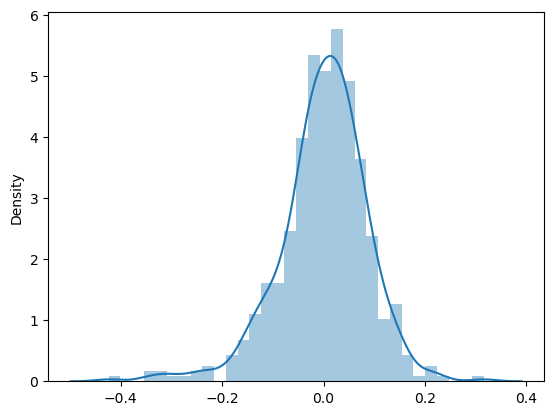

In [1025]:
y_train_pred = lr_model.predict(X_train_sm)

res = y_train - y_train_pred

sns.distplot(res)

### Prediction and Evaulation on test set

In [1026]:
# Instantiage an object

#create a list of numeric variable

num_vars = ['temp','atemp','hum','windspeed','cnt']

#use transform on test data as the fit should not be performed on test set ( in real scenario, test set is not available )

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
184,1,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,0,0,0,0,0,0
535,0,3,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,4,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,3,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,4,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,1,0,0,0,0,0


In [1027]:
df_test.describe()


,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,3.013636,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.187620,1.985057,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,5.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,6.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1028]:
y_test = df_test.pop("cnt")
X_test =df_test

In [1029]:
## add a constant

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()


,const,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
184,1.0,1,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1.0,0,3,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,1,0,0,0,0,0
299,1.0,0,4,1,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,0,0,0,0,0,0,1,0
221,1.0,0,3,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,4,1,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,0,1,0,0,0,0,0


In [1030]:
X_test_sm = X_test_sm.drop(['atemp','spring','Oct','June','Mar','July','May',], axis = 1)

X_test_sm.head()

,const,holiday,weekday,workingday,temp,hum,windspeed,summer,winter,Light Snow,Mist,2019,Aug,Dec,Feb,Jan,Nov,Sept
184,1.0,1,1,0,0.831783,0.657364,0.084219,0,0,0,1,0,0,0,0,0,0,0
535,1.0,0,3,1,0.901354,0.610133,0.153728,1,0,0,0,1,0,0,0,0,0,0
299,1.0,0,4,1,0.511964,0.837699,0.334206,0,1,0,1,0,0,0,0,0,0,0
221,1.0,0,3,1,0.881625,0.437098,0.339570,0,0,0,0,0,1,0,0,0,0,0
152,1.0,0,4,1,0.817246,0.314298,0.537414,1,0,0,0,0,0,0,0,0,0,0


In [1031]:
#predict

y_test_pred = lr_model.predict(X_test_sm)

In [1032]:
#evaluate the R2 score on the test data to evaluate the model performance.

r2_score(y_true = y_test ,y_pred = y_test_pred)


0.8197323406232018

### The test set has a R2 value of 81.9% which is close to 84.5% ofthe training data.